<a href="https://colab.research.google.com/github/Rino04/Hypothyroid-Prediction/blob/main/Hypothyroid_Prediction_Models_Week_8_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Understanding

## 1. Defining the Question

### a) Specifying the Question

> Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid. 



### b) Defining the Metric for Success

> Creating a models that can successfully predict whether a patient's symptoms indicate that they have hypothyroid or not.

### c) Understanding the context 

Hypothyroidism is a condition in which your thyroid gland doesn't produce enough of certain crucial hormones. It may not cause noticeable symptoms in the early stages. Over time, untreated hypothyroidism can cause a number of health problems, such as obesity, joint pain, infertility and heart disease.Hypothyroidism results when the thyroid gland fails to produce enough hormones.

When your thyroid doesn't produce enough hormones, the balance of chemical reactions in your body can be upset. There can be a number of causes, including autoimmune disease, hyperthyroidism treatments, radiation therapy, thyroid surgery and certain medications.

Your thyroid is a small, butterfly-shaped gland situated at the base of the front of your neck, just below your Adam's apple. Hormones produced by the thyroid gland — triiodothyronine (T3) and thyroxine (T4) — have an enormous impact on your health, affecting all aspects of your metabolism. These hormones also influence the control of vital functions, such as body temperature and heart rate.


### d) Recording the Experimental Design

The following steps will be followed in conducting this analysis:
1. Defining the Question
2. Reading the Data.
3. Data Exploration.
4. Data Cleaning
5. Data Analysis
6. Prediction Models
7. Evaluation of the solution
8. Challenging the solution
9. Conclusion

### e) Data Relevance

The data is relevant as it will help in prediction of whether a patient suffers from hypothyroids or not. 

# Data Exploration

## Importing Libaries

In [1]:
#Libariries for reading, manipulating, and visulizing data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;sns.set(font_scale=1.2)

#for modelling
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier


#for metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score

#for encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#for warning
import warnings
warnings.filterwarnings("ignore")

## Loading data and Preview data

In [2]:
#Loading the data
health_df=pd.read_csv('/content/hypothyroid.csv')

In [3]:
#Check for info
health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

In [4]:
#Check the shape
print('The data has', health_df.shape[0], 'rows and', health_df.shape[1],'columns')

The data has 3163 rows and 26 columns


In [5]:
#Preview the head
health_df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [6]:
#Preview the tail
health_df.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In [7]:
health_df.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

# Data Cleaning

### Uniformity

In [8]:
#We shall have the our column names written in pascal format
health_df.columns=health_df.columns.str.strip().str.lower().str.replace(' ','_').str.replace('(','').str.replace(')','')
health_df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'tsh_measured', 'tsh', 't3_measured', 't3', 'tt4_measured', 'tt4',
       't4u_measured', 't4u', 'fti_measured', 'fti', 'tbg_measured', 'tbg'],
      dtype='object')

In [9]:
health_df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,tsh_measured,tsh,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti,tbg_measured,tbg
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [10]:
#Lets replice where we have ? with NAN value
health_df.replace(to_replace='?', inplace=True, value=np.NaN)

In [11]:
#The dtype of our columns are object. 
cat_cols = ['sex', 'on_thyroxine','query_on_thyroxine','on_antithyroid_medication',
                       'thyroid_surgery','query_hypothyroid','query_hyperthyroid', 'pregnant',
                       'sick','tumor', 'lithium', 'goitre', 'tsh_measured', 't3_measured', 
                       'tt4_measured', 't4U_measured', 'fti_measured']

# Numerical columns array 
num_cols = ['age','tsh','t3', 'tt4', 't4u', 'fti']


# We shall convert the numeric columns to floats and categoricals columns to category

for col in health_df.columns:
  if col in num_cols:
    health_df[col] = pd.to_numeric(health_df[col])
  else:
    health_df[col] = health_df[col].astype('category')

# check to confirm
health_df.dtypes
# We have now fixed the dtype for each

status                       category
age                           float64
sex                          category
on_thyroxine                 category
query_on_thyroxine           category
on_antithyroid_medication    category
thyroid_surgery              category
query_hypothyroid            category
query_hyperthyroid           category
pregnant                     category
sick                         category
tumor                        category
lithium                      category
goitre                       category
tsh_measured                 category
tsh                           float64
t3_measured                  category
t3                            float64
tt4_measured                 category
tt4                           float64
t4u_measured                 category
t4u                           float64
fti_measured                 category
fti                           float64
tbg_measured                 category
tbg                          category
dtype: objec

In [12]:
#Lets check for unique values for each column
for col in list(health_df):
    print(col)
    print(health_df[col].unique())
    print("******")

status
['hypothyroid', 'negative']
Categories (2, object): ['hypothyroid', 'negative']
******
age
[72. 15. 24. 77. 85. 64. 20. 42. 69. 75. 53. 59. 68. 50. 78. 65. 28. 43.
 40. 84. nan 83. 63. 73. 36. 27. 48. 71. 60. 34. 79. 62. 74. 32. 41. 70.
 29.  5. 58. 35. 51. 22. 16. 44. 39. 47. 18. 17. 88. 56. 30. 45. 66. 52.
 54. 80. 33. 38. 92. 67. 46. 13. 89. 61. 49. 26. 57. 31. 90. 81. 25. 37.
 76. 87. 23. 55. 86. 98. 21. 97.  1.  6. 14. 82. 11. 19.  9. 12. 10.  8.
  7.  4. 93.]
******
sex
['M', 'F', NaN]
Categories (2, object): ['M', 'F']
******
on_thyroxine
['f', 't']
Categories (2, object): ['f', 't']
******
query_on_thyroxine
['f', 't']
Categories (2, object): ['f', 't']
******
on_antithyroid_medication
['f', 't']
Categories (2, object): ['f', 't']
******
thyroid_surgery
['f', 't']
Categories (2, object): ['f', 't']
******
query_hypothyroid
['f', 't']
Categories (2, object): ['f', 't']
******
query_hyperthyroid
['f', 't']
Categories (2, object): ['f', 't']
******
pregnant
['f', 't']
Categ

### Completeness

In [13]:
#check for null values
health_df.isnull().sum()

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
tsh_measured                    0
tsh                           468
t3_measured                     0
t3                            695
tt4_measured                    0
tt4                           249
t4u_measured                    0
t4u                           248
fti_measured                    0
fti                           247
tbg_measured                    0
tbg                          2903
dtype: int64

In [14]:
#Column TBG contains all null values we shall drop it
health_df=health_df.drop('tbg', axis=1)
health_df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'tsh_measured', 'tsh', 't3_measured', 't3', 'tt4_measured', 'tt4',
       't4u_measured', 't4u', 'fti_measured', 'fti', 'tbg_measured'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1ef2781e10>,
      dtype=object)

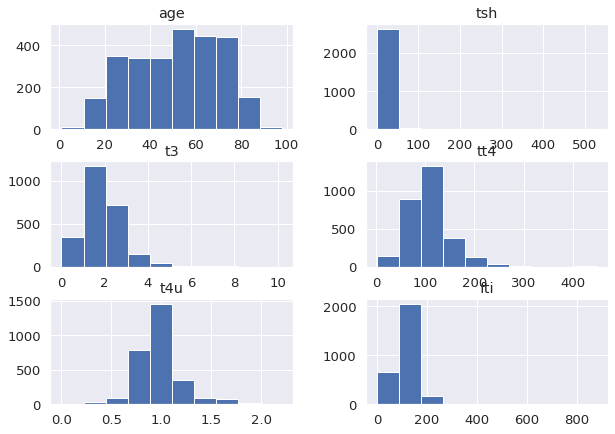

In [15]:
#check the distribution to understand which imputation method to use
health_df.hist(figsize = (10,7))

In [16]:
#Age, tsh and T4u show a normal distribution. we shall use mean for imputations
health_df['age'].fillna(health_df['age'].mean(), inplace=True)
health_df.t4u.fillna(health_df.t4u.mean(), inplace=True)
health_df.tsh.fillna(health_df.tsh.mean(), inplace=True)

In [17]:
#for fti, t3 and tt4 the distribution shows that they are skewed. we shall impute using median since its not influenced by median
health_df.tt4.fillna(health_df.tt4.median(), inplace=True)
health_df.fti.fillna(health_df.fti.median(), inplace=True)
health_df.t3.fillna(health_df.t3.median(), inplace=True)

In [18]:
health_df.sex.unique()

['M', 'F', NaN]
Categories (2, object): ['M', 'F']

In [19]:
#For the case of null values in sex, we are unable to determine the gender of missing value.
#We shall assume that nan values are females. This is because hypothyroidism is more rampandant in women than men


health_df['sex'].fillna('F', inplace = True)

# let us see if we have successfully filled all missing values
health_df.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
tsh_measured                 0
tsh                          0
t3_measured                  0
t3                           0
tt4_measured                 0
tt4                          0
t4u_measured                 0
t4u                          0
fti_measured                 0
fti                          0
tbg_measured                 0
dtype: int64

### Consistency 

In [20]:
#we will look for the number of rows with duplicate records
print('Number of rows with duplicated values',health_df.duplicated().sum())

#we then drop the rows with duplicated records
health_df.drop_duplicates(inplace=True)
print('After dropping there are',health_df.duplicated().sum(), "Duplicated rows")

print('Shape of dataframe after dropping duplicated rows', health_df.shape)

Number of rows with duplicated values 156
After dropping there are 0 Duplicated rows
Shape of dataframe after dropping duplicated rows (3007, 25)


### Outliers

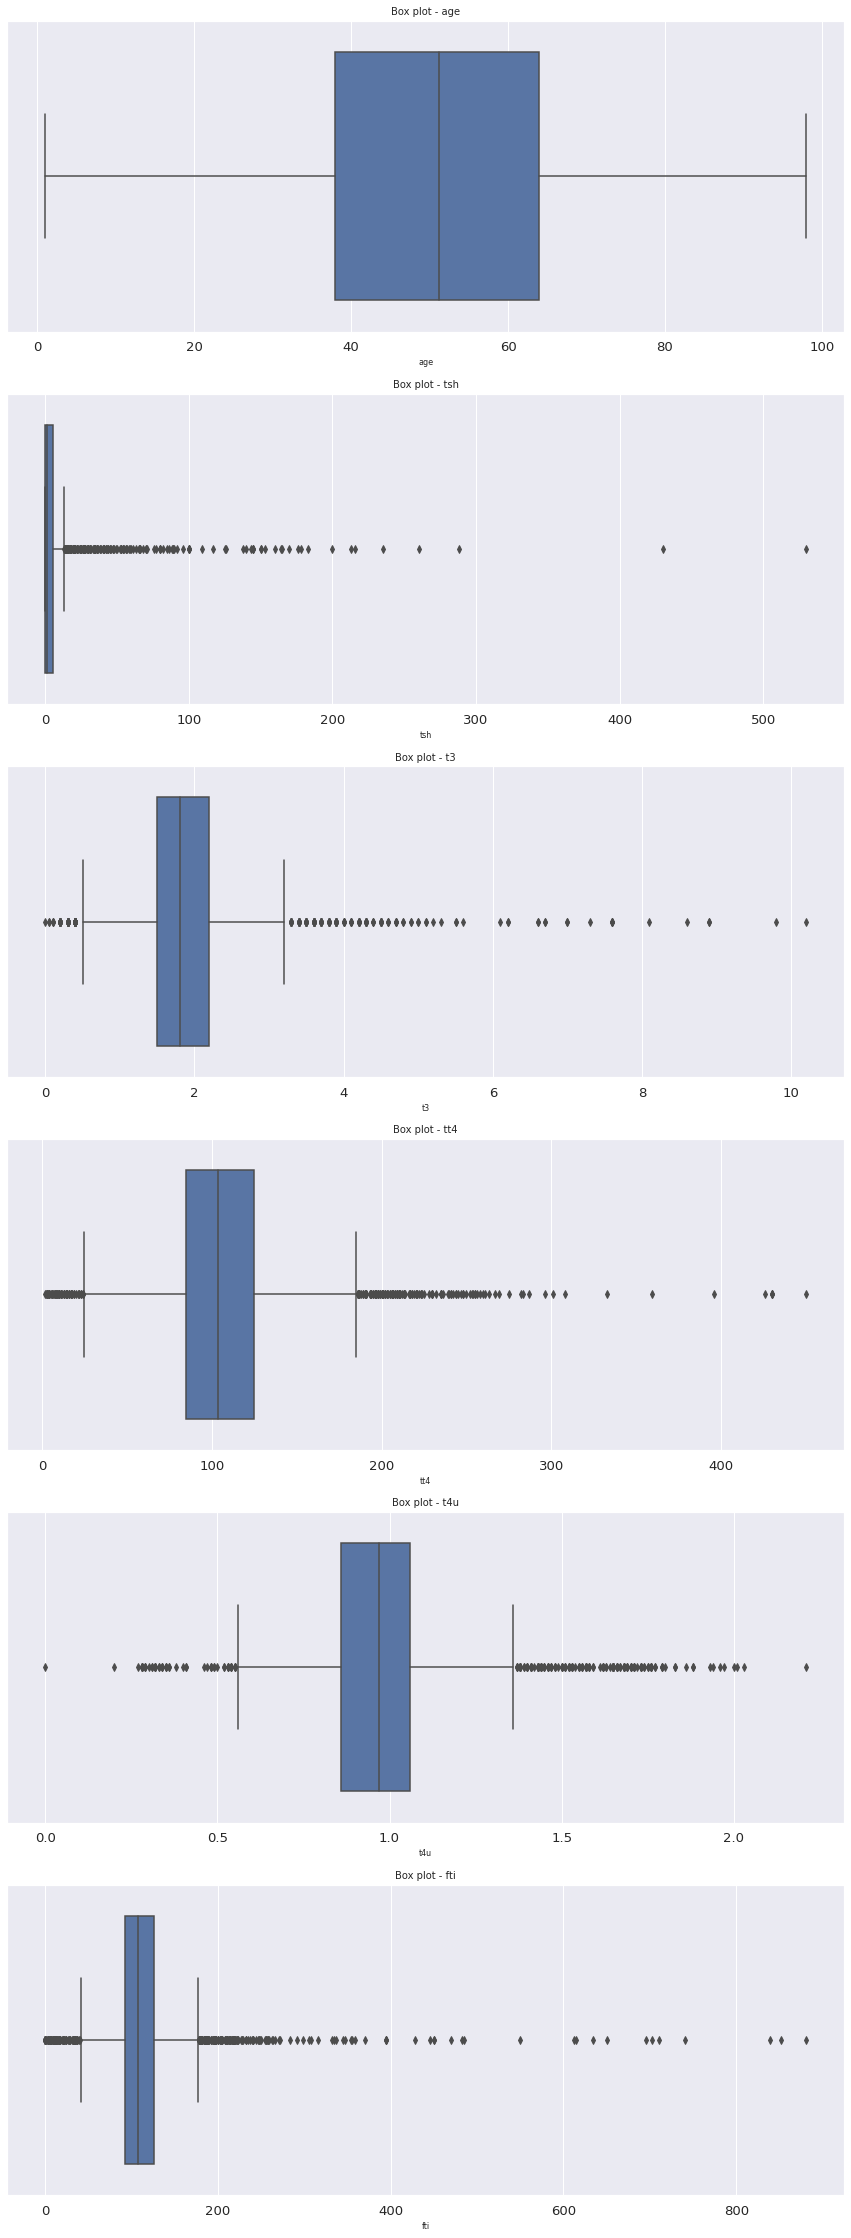

In [21]:
col_names=num_cols
fig, ax = plt.subplots(len(col_names), figsize=(15,40))

for i, col_val in enumerate(col_names):
    sns.boxplot(health_df[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
plt.show()

# Exploratory Data Analysis

### Univarient Analysis

In [22]:
#We shall check the statistical summaries of the data
health_df.describe()

,age,tsh,t3,tt4,t4u,fti
count,3007.000000,3007.000000,3007.000000,3007.000000,3007.000000,3007.000000
mean,51.350030,5.823557,1.906950,108.454905,0.977593,115.040206
std,17.864731,22.470602,0.877747,43.408647,0.219705,58.566137
min,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,38.000000,0.000000,1.500000,85.000000,0.860000,92.000000
50%,51.154214,1.000000,1.800000,104.000000,0.970000,107.000000
75%,64.000000,5.300000,2.200000,125.000000,1.060000,126.000000
max,98.000000,530.000000,10.200000,450.000000,2.210000,881.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1eec76a110>,
      dtype=object)

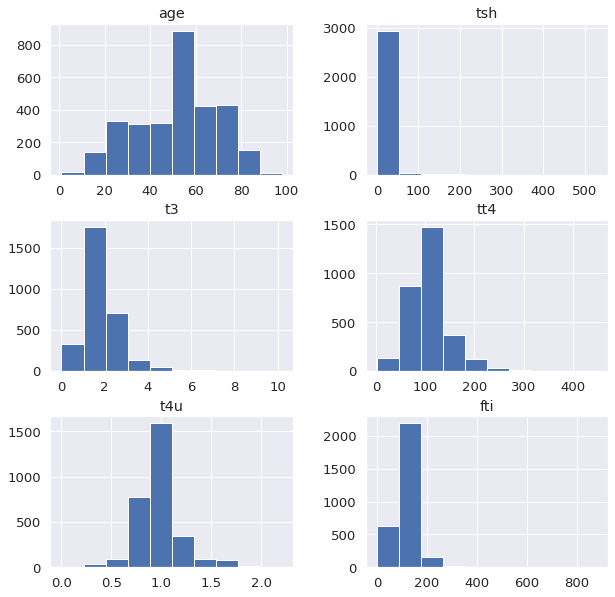

In [23]:
#Visulize the distribution
health_df.hist(figsize=(10,10))
#Age, t4u show a normal distribution while tt4,t3 and fti are skewed.

In [24]:
health_df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'tsh_measured', 'tsh', 't3_measured', 't3', 'tt4_measured', 'tt4',
       't4u_measured', 't4u', 'fti_measured', 'fti', 'tbg_measured'],
      dtype='object')

In [25]:
cat_cols

['sex',
 'on_thyroxine',
 'query_on_thyroxine',
 'on_antithyroid_medication',
 'thyroid_surgery',
 'query_hypothyroid',
 'query_hyperthyroid',
 'pregnant',
 'sick',
 'tumor',
 'lithium',
 'goitre',
 'tsh_measured',
 't3_measured',
 'tt4_measured',
 't4U_measured',
 'fti_measured']

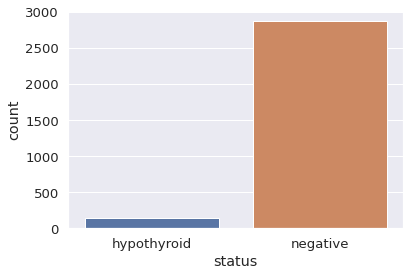

In [26]:
#visulize the status cols
sns.countplot(health_df.status)
#From the countplot we can see see that most of the cases were negative

Text(0.5, 1.0, 'A Pie chart of Gender')

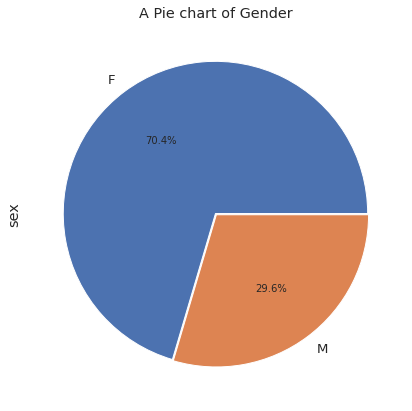

In [27]:
#visulize the gender distribution
explode=[0.0, 0.01]
health_df['sex'].value_counts().head(4).plot(kind= 'pie', figsize=[7,7], autopct = '%1.1f%%', explode=explode)
plt.title('A Pie chart of Gender') 
#The pie plot shows that there were more females than male

In [28]:
#Visulize some categorical cols
# cols=['pregnant', 'tumor', 'sick']
# for i in cols:
#   sns.countplot(health_df[i])
  

### Bivarient Analysis

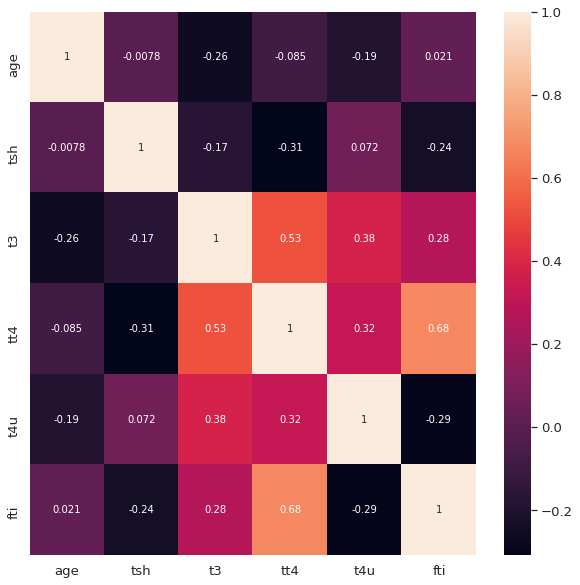

In [29]:
#Lets visulize the correlations between each cols
corr=health_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True)

In [90]:
#How which age groups were reported to have the hypothyroids
health_df.groupby(['status', 'age'])['age'].count().sort_values(ascending=False)
#Most of the patients who reported to have hypothyroids were aged 51 years (410). 

status  age      
0       51.154214    410
        59.000000     59
        58.000000     55
        62.000000     55
        70.000000     55
                    ... 
1       30.000000      1
        51.000000      1
        32.000000      1
        47.000000      1
        88.000000      1
Name: age, Length: 143, dtype: int64

In [31]:
health_df.sick.unique()

['f', 't']
Categories (2, object): ['f', 't']

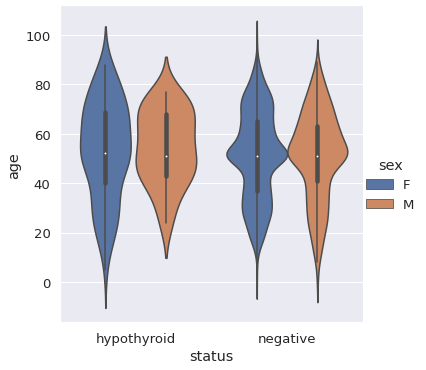

In [32]:
sns.catplot(x="status", y="age", hue="sex",data=health_df, kind="violin")
#Most of the patients were aged between 40-80 years with women registering the highest number.

In [33]:
health_df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'tsh_measured', 'tsh', 't3_measured', 't3', 'tt4_measured', 'tt4',
       't4u_measured', 't4u', 'fti_measured', 'fti', 'tbg_measured'],
      dtype='object')

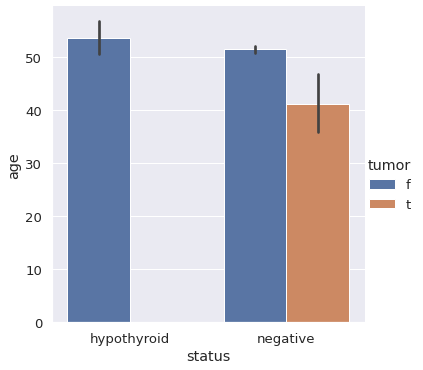

In [34]:
sns.catplot(x="status", y='age', hue="tumor",data=health_df, kind="bar")
#Most of the patients registered to have hypothyroid did not have a tumor.

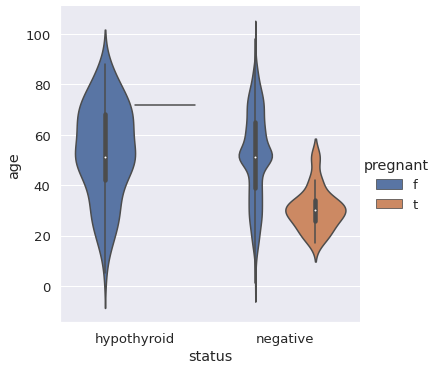

In [35]:
sns.catplot(x="status", y='age', hue="pregnant",data=health_df, kind="violin")
# From the plot most patient that were found to have hypothroid were not pregrant 

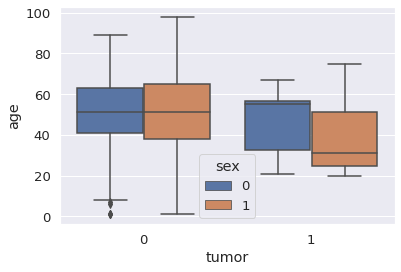

In [92]:
#Box plot to visulize the patients with tumor and the their ages
sns.boxplot(x="tumor", y="age",
            hue="sex",
            data=health_df)

In [93]:
#numeric cols
num_cols

['age', 'tsh', 't3', 'tt4', 't4u', 'fti']

### Mulitivarient Analysis

In [36]:
health_df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,tsh_measured,tsh,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti,tbg_measured
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,f,f,f,f,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0,n
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,f,f,f,f,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0,n
2,hypothyroid,24.0,M,f,f,f,f,f,f,f,f,f,f,f,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0,n
3,hypothyroid,24.0,F,f,f,f,f,f,f,f,f,f,f,f,y,430.0,y,0.4,y,6.0,y,1.04,y,6.0,n
4,hypothyroid,77.0,M,f,f,f,f,f,f,f,f,f,f,f,y,7.3,y,1.2,y,57.0,y,1.28,y,44.0,n


In [37]:
health_df.dtypes

status                       category
age                           float64
sex                          category
on_thyroxine                 category
query_on_thyroxine           category
on_antithyroid_medication    category
thyroid_surgery              category
query_hypothyroid            category
query_hyperthyroid           category
pregnant                     category
sick                         category
tumor                        category
lithium                      category
goitre                       category
tsh_measured                 category
tsh                           float64
t3_measured                  category
t3                            float64
tt4_measured                 category
tt4                           float64
t4u_measured                 category
t4u                           float64
fti_measured                 category
fti                           float64
tbg_measured                 category
dtype: object

In [38]:
# Data preprocessing
health_df=health_df.replace({"t":1,"f":0, "y":1, "n":0, "hypothyroid":1, "negative":0, "F":1, "M":0})
health_df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,tsh_measured,tsh,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti,tbg_measured
0,1,72.0,0,0,0,0,0,0,0,0,0,0,0,0,1,30.0,1,0.6,1,15.0,1,1.48,1,10.0,0
1,1,15.0,1,1,0,0,0,0,0,0,0,0,0,0,1,145.0,1,1.7,1,19.0,1,1.13,1,17.0,0
2,1,24.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1,0.2,1,4.0,1,1.00,1,0.0,0
3,1,24.0,1,0,0,0,0,0,0,0,0,0,0,0,1,430.0,1,0.4,1,6.0,1,1.04,1,6.0,0
4,1,77.0,0,0,0,0,0,0,0,0,0,0,0,0,1,7.3,1,1.2,1,57.0,1,1.28,1,44.0,0


In [39]:
#Select X and y
X=health_df.drop('status', axis=1)
y=health_df.status

#Perorming LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda=LDA()
#Normalizing our data
sc = StandardScaler()
X_train =sc.fit_transform(X)
X_test = sc.transform (X)

X_lda=lda.fit(X,y)
#Getting the coeffients
X_lda.coef_

array([[ 8.66548848e-03,  1.44723973e-01,  2.67232955e-01,
        -7.42857960e-01, -1.00731903e+00,  1.20840896e+00,
         2.86423466e-02,  8.93281120e-01, -9.32131336e-01,
        -1.17349581e+00, -1.23580363e+00, -3.79231052e+00,
         6.72911558e-01,  1.74728765e+00,  1.73573946e-01,
         7.90364863e-02, -1.67323305e-01,  1.21318579e+00,
        -7.03448504e-02, -2.58137804e+00,  7.93518959e+00,
         8.69766251e+00,  1.73075549e-02,  6.78578129e+00]])

In [40]:
#getting the columns names
result=pd.DataFrame(index=X.columns.values,data=X_lda.coef_[0])
result.sort_values(0,ascending=False)

,0
fti_measured,8.697663
t4u,7.935190
tbg_measured,6.785781
tsh_measured,1.747288
tt4_measured,1.213186
thyroid_surgery,1.208409
query_hyperthyroid,0.893281
goitre,0.672912
on_thyroxine,0.267233
tsh,0.173574


# Modelling

## Random Forest Classification

In [41]:
#Split X and y
X=health_df.drop('status', axis=1)
y=health_df.status

#Train_test. Our training size shall be 80% of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Scalling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train =sc.fit_transform(X_train)
X_test = sc.transform (X_test)

#Modelling
forest= RandomForestClassifier(n_estimators = 100, random_state = 42,min_samples_split = 10, max_depth=5)
forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)
#Check for the acccurancy of our model
accuracy_score=accuracy_score(y_test,y_pred)
accuracy_score
#We have gotten an accurancy score of 98.67% which is quite good for our model.

0.9867109634551495

In [42]:
#Check the confussion metrix to determine how many were true possitive
confusion_matrix=confusion_matrix(y_test, y_pred)
confusion_matrix

array([[576,   1],
       [  7,  18]])

In [43]:
#To learn how well our model is we shall check how it performed with our train test
from sklearn.metrics import confusion_matrix, accuracy_score
y_train_pred=forest.predict(X_train)
accuracy_score_train=accuracy_score(y_train,y_train_pred)
accuracy_score_train
#the accurancy score of training set is 98.91%.

0.9891891891891892

In [44]:
#Check the confussion metrix to determine how many were true possitive
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix=confusion_matrix(y_train, y_train_pred)
confusion_matrix

array([[2282,    7],
       [  19,   97]])

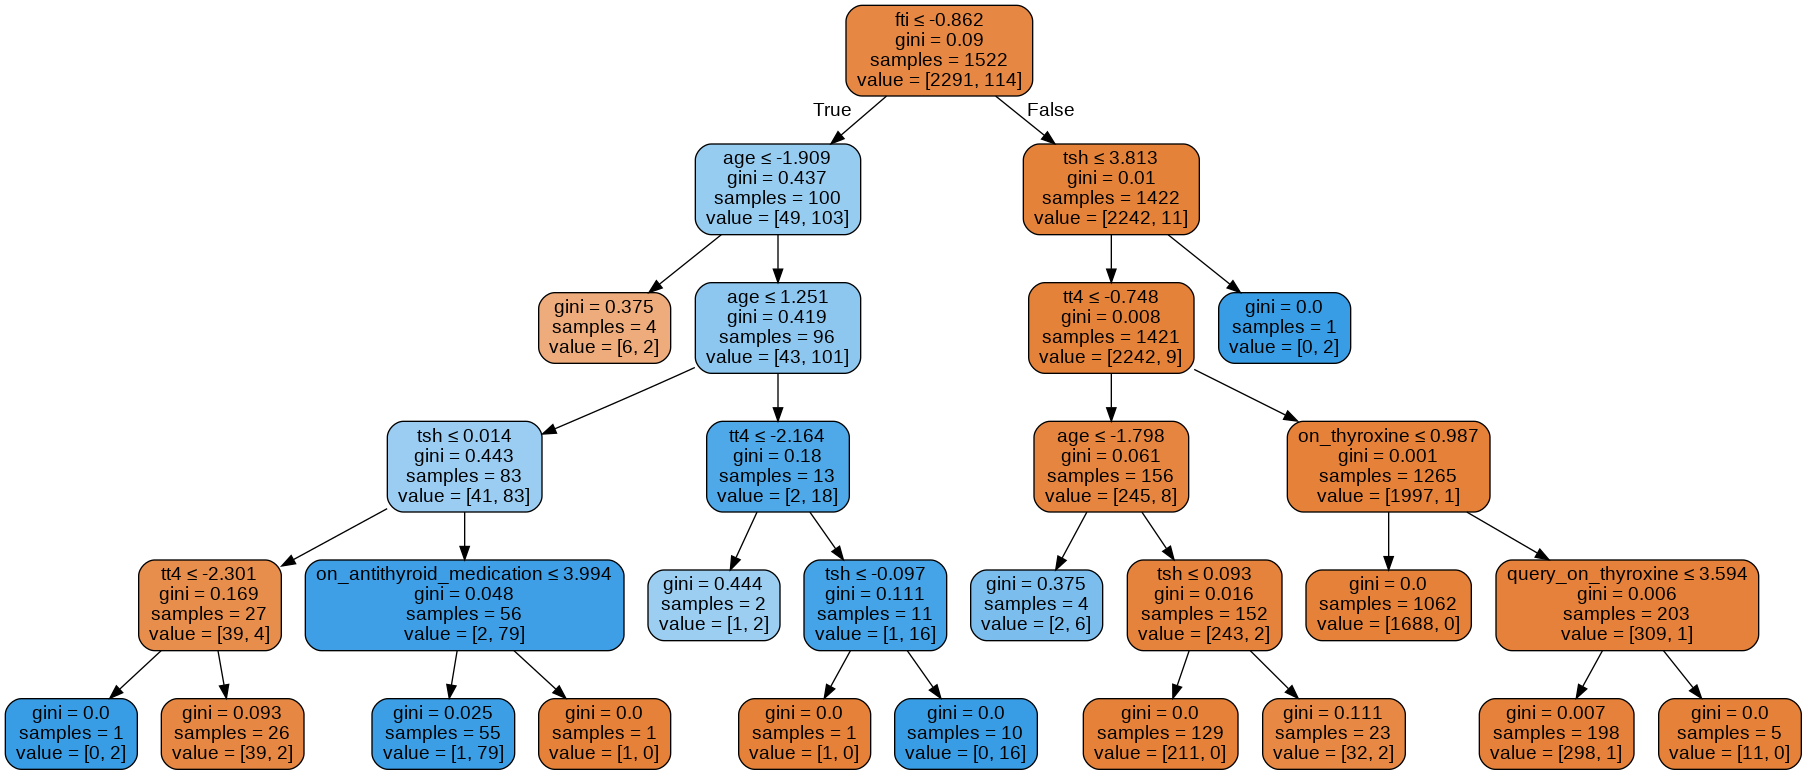

In [45]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[50]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypothyroid_forest.png')
Image(graph.create_png())

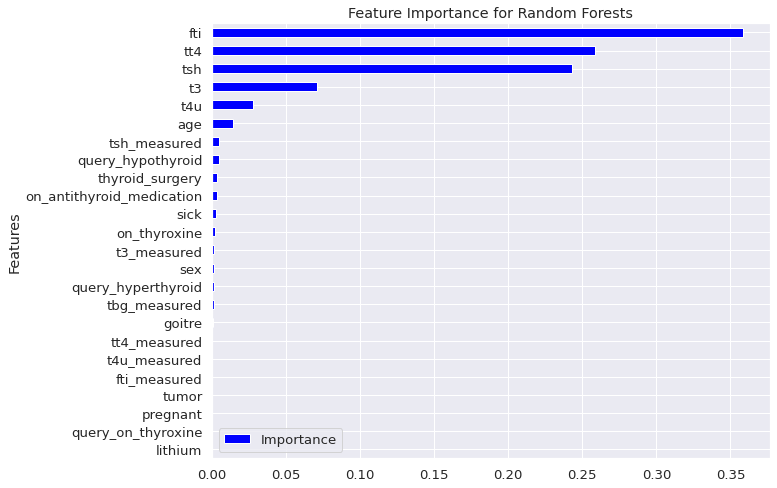

In [46]:
#gettting the features importance and plotting them in a bar graph
pd.DataFrame({'Features' : X.columns, 'Importance' : forest.feature_importances_})\
.sort_values(by = 'Importance', ascending = True).set_index('Features')\
.plot.barh(title = 'Feature Importance for Random Forests',figsize = (10, 8), color = 'blue')
plt.show()
#From the graph it is evident that fti, tt4,tsh and t3 are the most important features during modeling.

### Hyperparameter Tuning

In [47]:
# Wes hall apply parameters to the model to see how it performs
from sklearn.model_selection import RandomizedSearchCV
# Create the random grid
random_grid = {'n_estimators': (10,1000,10),
               'max_features': ['auto','sqrt'],
               'max_depth': [5,10,15,20],
               'min_samples_split': [2,5,10]}
#Using random forest classiffier
randomForest=RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = randomForest, param_distributions = random_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X, y)
print(f'The best parameters are: {rf_random.best_params_}')

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   21.2s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.6min


The best parameters are: {'n_estimators': 10, 'min_samples_split': 2, 'max_features': 'auto', 'max_depth': 10}


[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  2.1min finished


In [48]:
#Since now we have been able to get the best parameters we shall apply them to the model
#From before we found out our most import features. We shall use 10 of them in this model
X=health_df[['fti','tt4', 'tsh', 't3','t4u','age', 'tsh_measured', 'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid']]
y=health_df.status

#Train_test. Our training size shall be 80% of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Scalling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train =sc.fit_transform(X_train)
X_test = sc.transform (X_test)

#Modelling
forest= RandomForestClassifier(n_estimators = 10, random_state = 42,min_samples_split = 5, max_depth=20)
forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)
y_train_pred = forest.predict(X_train)
#Check for the acccurancy of our model
from sklearn.metrics import confusion_matrix, accuracy_score
print("Confussion matrix for test data is", confusion_matrix(y_test, y_pred))
accuracy_score=accuracy_score(y_test,y_pred)
accuracy_score

Confussion matrix for test data is [[575   2]
 [  3  22]]


0.9916943521594684

In [49]:
#Check how it performed on training data
from sklearn.metrics import confusion_matrix, accuracy_score
print("Accurancy of training data is", accuracy_score(y_train, y_train_pred))
print("Confussion matrix for training data is", confusion_matrix(y_train, y_train_pred))

Accurancy of training data is 0.9958419958419958
Confussion matrix for training data is [[2285    4]
 [   6  110]]


In [50]:
X=health_df.drop('status', axis=1)
y=health_df.status

#lets check hoe the model performs with the best parameters with the whole datasets
#Train_test. Our training size shall be 80% of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Scalling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train =sc.fit_transform(X_train)
X_test = sc.transform (X_test)

#Modelling
forest= RandomForestClassifier(n_estimators = 10, random_state = 42,min_samples_split = 5, max_depth=15)
forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)
y_train_pred = forest.predict(X_train)
#Check for the acccurancy of our model
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score=accuracy_score(y_test,y_pred)
accuracy_score

0.9867109634551495

In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix=confusion_matrix(y_test, y_pred)
confusion_matrix

array([[574,   3],
       [  5,  20]])

In [52]:
#performance for training
from sklearn.metrics import confusion_matrix, accuracy_score
print("Accurancy of training data is", accuracy_score(y_train, y_train_pred))
print("Confussion matrix for training data is", confusion_matrix(y_train, y_train_pred))

Accurancy of training data is 0.9962577962577963
Confussion matrix for training data is [[2286    3]
 [   6  110]]


### Gradient Boosted Trees

In [53]:
#splitting x and y
X=health_df.drop('status', axis=1)
y=health_df.status

#split, train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Performing standard scalar normalization to normalize our feature set.
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train =sc.fit_transform(X_train)
X_test = sc.transform (X_test)

#model
gbc = GradientBoostingClassifier(loss='deviance',n_estimators=200, learning_rate=0.01, max_depth=5)
gbc = gbc.fit(X_train, y_train)

# Prediction
y_gbc_pred = gbc.predict(X_test)

#Check the metrics
from sklearn.metrics import accuracy_score, confusion_matrix
print("Confussion matrix for test data is", confusion_matrix(y_test, y_pred))
accuracy_score=accuracy_score(y_test,y_gbc_pred)
accuracy_score

Confussion matrix for test data is [[550  22]
 [ 29   1]]


0.9916943521594684

In [54]:
#check the confusion metrix
from sklearn.metrics import accuracy_score, confusion_matrix
confusion_matrix=confusion_matrix(y_test,y_gbc_pred)
confusion_matrix

array([[571,   1],
       [  4,  26]])

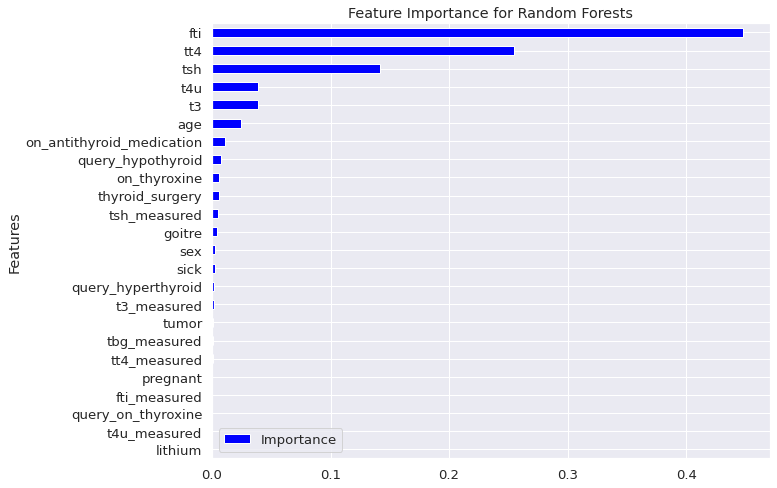

In [55]:
#gettting the features importance and plotting them in a bar graph
pd.DataFrame({'Features' : X.columns, 'Importance' : forest.feature_importances_})\
.sort_values(by = 'Importance', ascending = True).set_index('Features')\
.plot.barh(title = 'Feature Importance for Random Forests',figsize = (10, 8), color = 'blue')
plt.show()

### Hyperparameter Tuning

In [56]:
# We shall apply parameters to the model to see how it performs
from sklearn.model_selection import RandomizedSearchCV
# Create the random grid
random_grid = {'n_estimators': (10,1000,10),
               'max_features': ['auto','sqrt'],
               'max_depth': [5,10,15,20],
               'min_samples_split': [2,5,10]}
#Using random forest classiffier
gbc=GradientBoostingClassifier()
rf_random = RandomizedSearchCV(estimator = gbc, param_distributions = random_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X, y)
print(f'The best parameters are: {rf_random.best_params_}')

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done 166 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  1.7min finished


The best parameters are: {'n_estimators': 1000, 'min_samples_split': 2, 'max_features': 'sqrt', 'max_depth': 5}


In [57]:
#Since now we have been able to get the best parameters we shall apply them to the model
#From before we found out our most import features. We shall use 10 of them in this model
X=health_df[['fti','tt4', 'tsh', 't3','t4u','age', 'tsh_measured', 'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid']]
y=health_df.status

#Train_test. Our training size shall be 80% of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Scalling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train =sc.fit_transform(X_train)
X_test = sc.transform (X_test)

#Modelling
forest= GradientBoostingClassifier(n_estimators = 1000, random_state = 42,min_samples_split = 2, max_depth=5)
forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)
y_train_pred = forest.predict(X_train)
#Check for the acccurancy of our model
from sklearn.metrics import confusion_matrix, accuracy_score
print("Confussion matrix for test data is", confusion_matrix(y_test, y_pred))
accuracy_score=accuracy_score(y_test,y_pred)
accuracy_score

Confussion matrix for test data is [[573   4]
 [  2  23]]


0.9900332225913622

In [58]:
#Check how it performed on training data
from sklearn.metrics import confusion_matrix, accuracy_score
print("Accurancy of training data is", accuracy_score(y_train, y_train_pred))
print("Confussion matrix for training data is", confusion_matrix(y_train, y_train_pred))

Accurancy of training data is 1.0
Confussion matrix for training data is [[2289    0]
 [   0  116]]


In [59]:
X=health_df.drop('status', axis=1)
y=health_df.status

#lets check hoe the model performs with the best parameters with the whole datasets
#Train_test. Our training size shall be 80% of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Scalling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train =sc.fit_transform(X_train)
X_test = sc.transform (X_test)

#Modelling
forest= RandomForestClassifier(n_estimators = 1000, random_state = 42,min_samples_split = 2, max_depth=5)
forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)
y_train_pred = forest.predict(X_train)
#Check for the acccurancy of our model
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score=accuracy_score(y_test,y_pred)
accuracy_score

0.9850498338870431

In [60]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix=confusion_matrix(y_test, y_pred)
confusion_matrix

array([[575,   2],
       [  7,  18]])

In [61]:
#performance for training
from sklearn.metrics import confusion_matrix, accuracy_score
print("Accurancy of training data is", accuracy_score(y_train, y_train_pred))
print("Confussion matrix for training data is", confusion_matrix(y_train, y_train_pred))

Accurancy of training data is 0.9891891891891892
Confussion matrix for training data is [[2282    7]
 [  19   97]]


### Observations:


In [62]:
#The accurancy score of the first model was 98.67% with 576 true postive and 18 true negative. 
# When hyperparametric tuning was applied the accurancy score increased to 99.67% and the number of true positive were 574 20.
# however, the best performing model was when 10 important features are the only one used to train the model.
#When gradient boosted was applied the accurancy score was quite high than before, 99% and correct predictions were(570, 26). 

## Support Vector Machines

In [63]:
#Splitting the dataset
X=health_df.drop('status', axis=1)
y=health_df.status

# split, test, train.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#standardize
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Fitting the model: Linear Kernel

In [64]:
#fitting the linear kernel
model = SVC(kernel= 'linear')
model.fit(X_train,y_train)

#Predictions
y_pred=model.predict(X_test)

#Evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(y_test,y_pred))
confusion_matrix=confusion_matrix(y_test,y_pred)
confusion_matrix

0.9850498338870431


array([[572,   0],
       [  9,  21]])

In [65]:
#Check performance of training data
y_train_pred=model.predict(X_train)
from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(y_train,y_train_pred))
confusion_matrix=confusion_matrix(y_train,y_train_pred)
confusion_matrix

0.9833679833679834


array([[2284,   10],
       [  30,   81]])

### Fitting the model: Polynomial Kernel

In [66]:
# Building the model 
polyclassifier = SVC(kernel='poly',degree=3,gamma='auto')
# Training the model using the training set
polyclassifier.fit(X_train, y_train)

#Predictions
y_pred=polyclassifier.predict(X_test)

#Evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(y_test,y_pred))
confusion_matrix=confusion_matrix(y_test,y_pred)
confusion_matrix

0.96843853820598


array([[572,   0],
       [ 19,  11]])

In [67]:
#Check performance of training data
y_train_pred=polyclassifier.predict(X_train)
from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(y_train,y_train_pred))
confusion_matrix=confusion_matrix(y_train,y_train_pred)
confusion_matrix

0.9792099792099792


array([[2290,    4],
       [  46,   65]])

### Fitting the model: Radial basis function (rbf)

In [68]:
# Building the model 
rbfclassifier = SVC(kernel='rbf')
# Training the model using the training set
rbfclassifier.fit(X_train, y_train)

# making prediction
y_pred_rbf = rbfclassifier.predict(X_test)

# Model Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix
print( accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.96843853820598
[[572   0]
 [ 19  11]]


In [69]:
#Evaluate the train
y_train_pred_rbf=rbfclassifier.predict(X_train)
# Model Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix
print( accuracy_score(y_train, y_train_pred_rbf))
print(confusion_matrix(y_train, y_train_pred_rbf))

0.9846153846153847
[[2286    8]
 [  29   82]]


### Fitting the model: Sigmoid function

In [70]:
# Building the model 
sigclassifier = SVC(kernel='sigmoid')
# Training the model using the training set
sigclassifier.fit(X_train, y_train)

# making prediction
y_pred = sigclassifier.predict(X_test)

# Model Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix
print( accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9750830564784053
[[564   8]
 [  7  23]]


In [71]:
#Evaluate the train
y_train_pred_sigmoid=sigclassifier.predict(X_train)
# Model Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix
print( accuracy_score(y_train, y_train_pred_sigmoid))
print(confusion_matrix(y_train, y_train_pred_sigmoid))

0.9758835758835759
[[2269   25]
 [  33   78]]


### Hyperparametric tuning

In [72]:
#Define parameters to be used
parameters={'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','sigmoid']
            }
#We shall employ randomsearchcv
from sklearn.model_selection import RandomizedSearchCV
#Using random forest classiffier
svc=SVC()
rf_random = RandomizedSearchCV(estimator = svc, param_distributions = parameters, 
                               n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X, y)
print(f'The best parameters are: {rf_random.best_params_}')

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    5.2s


The best parameters are: {'kernel': 'rbf', 'gamma': 0.0001, 'C': 100}


[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   14.8s finished


In [73]:
#Lets now apply the best parameters to our model
#Splitting the dataset
X=health_df.drop('status', axis=1)
y=health_df.status

# split, test, train.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#standardize
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Fit the model
#The best model is rbf 
model = SVC(kernel= 'rbf', C=100, gamma=0.0001, degree=3)
model.fit(X_train, y_train)

#Make prediction
y_pred=model.predict(X_test)
#Evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(y_test,y_pred))
confusion_matrix=confusion_matrix(y_test,y_pred)
confusion_matrix

0.9717607973421927


array([[571,   1],
       [ 16,  14]])

In [74]:
#Check performance of training data
y_train_pred=model.predict(X_train)
from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(y_train,y_train_pred))
confusion_matrix=confusion_matrix(y_train,y_train_pred)
confusion_matrix

0.9804573804573805


array([[2287,    7],
       [  40,   71]])

### Observations

In [75]:
#We have performed all the types of kernel models. The best was rbf kernel with the best accurancy score. This was also confirmed during the hyperparameters tuning. 
#The worst performing was sigmoind kernel with the lowest accurancy score.  

# Conclusion

1. After performing all the models, gradient boosted classifier performed the best. Its accurancy score (99.16%) and nmber of confusion score  was the highest.
2. During the hyperparameters tuning and using the ten important eatures was are able to achieve the highest score.

## Challenge your solution


**Did we have the correct data?**
Yes we did. The data provided was the right data as it has provided us with the correct features to help predict if a patient suffers from hypothyroid or not.
